In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
uber = pd.read_csv('uber-rides-dataset.csv')
print(uber.shape)

(678, 45)


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_completed_at      678 non-null    object 
 1   trip_status            678 non-null    object 
 2   ride_hailing_app       678 non-null    object 
 3   trip_uid               678 non-null    object 
 4   driver_uid             678 non-null    object 
 5   rider_uid              678 non-null    object 
 6   customer               678 non-null    object 
 7   trip_start_time        678 non-null    object 
 8   trip_end_time          678 non-null    object 
 9   trip_time              678 non-null    object 
 10  total_time             678 non-null    object 
 11  wait_time              678 non-null    object 
 12  trip_type              678 non-null    object 
 13  surge_multiplier       643 non-null    float64
 14  vehicle_make_model     678 non-null    object 
 15  vehicl

In [4]:
columns = ['precipitation', 'weather_main', 'feels_like', 'temperature_value', 'temperature_time'
          , 'price_rub','rub_usd_exchange_rate', 'trip_path_image_url', 'trip_map_image_url'
          , 'driver_photo_url', 'surge_multiplier' , 'rider_uid', 'driver_uid', 'trip_uid'
          , 'country', 'customer', 'trip_end_address', 'trip_start_address', 'vehicle_license_plate'
          , 'driver_name_en', 'driver_phone_number', ]

In [5]:
new_uber = uber.drop(columns, axis=1)

In [6]:
data = new_uber[(new_uber['trip_status'] == 'Completed') & (new_uber['ride_hailing_app'] == 'Uber')]

In [7]:
data.drop(['trip_status', 'ride_hailing_app', 'trip_completed_at'], axis=1, inplace=True)

In [8]:
data

,trip_start_time,trip_end_time,trip_time,total_time,wait_time,trip_type,vehicle_make_model,vehicle_make,vehicle_model,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,city,price_usd,distance_kms,humidity,wind_speed,cloudness,weather_desc
0,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,00:29:00,00:07:27,uberX,Ford Focus,Ford,Focus,Male,60.031438,30.329826,59.963131,30.307655,Saint Petersburg,5.17,9.29,0.69,4.81,0.78,Mostly Cloudy
1,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,00:26:00,00:06:33,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.963014,30.307313,60.031351,30.329495,Saint Petersburg,4.97,9.93,0.70,6.53,0.66,Mostly Cloudy
2,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,01:23:00,00:16:07,uberX,Renault Fluence,Renault,Fluence,Male,60.031529,30.329416,59.924281,30.387561,Saint Petersburg,13.01,18.01,0.61,5.25,0.86,Mostly Cloudy
3,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,00:20:00,00:06:23,uberBLACK,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,Male,59.959883,30.311159,59.934680,30.308489,Saint Petersburg,25.99,5.10,0.84,0.87,0.56,Partly Cloudy
4,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,00:49:00,00:10:06,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.934813,30.308553,60.031470,30.329402,Saint Petersburg,13.43,21.92,0.90,1.61,0.31,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,00:12:00,00:01:23,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.939274,30.416977,59.946200,30.474258,Saint Petersburg,2.60,5.79,0.39,2.57,0.18,Clear
674,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,00:37:00,00:13:19,uberX,Dongfeng H30,Dongfeng,H30,Male,59.941415,30.366456,60.011173,30.386566,Saint Petersburg,3.92,11.46,0.62,5.37,0.48,Partly Cloudy
675,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,00:35:00,00:18:40,uberX,Chevrolet Aveo,Chevrolet,Aveo,Male,59.941415,30.366456,59.916832,30.450724,Saint Petersburg,2.78,6.68,0.76,4.02,0.9,Mostly Cloudy
676,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,00:23:00,00:03:41,uberX,Skoda Rapid,Skoda,Rapid,Male,59.916862,30.451020,59.941415,30.366456,Saint Petersburg,3.33,7.48,0.68,4.28,0.79,Mostly Cloudy


In [9]:
#data['year_start'] = data['trip_start_time'].transform(lambda x: x.split('-')[0])
#data['year_end'] = data['trip_end_time'].transform(lambda x: x.split('-')[0])

In [10]:
#data['month_start'] = data['trip_start_time'].transform(lambda x: x.split('-')[1])
#data['month_end'] = data['trip_end_time'].transform(lambda x: x.split('-')[1])
#data['day_start'] = data['trip_start_time'].transform(lambda x: x.split('-')[2][:2])
#data['day_end'] = data['trip_end_time'].transform(lambda x: x.split('-')[2][:2])
#data['time_start'] = data['trip_start_time'].transform(lambda x: x.split('-')[2][2:])
#data['time_end'] = data['trip_end_time'].transform(lambda x: x.split('-')[2][2:])

In [11]:
#data.drop(['trip_start_time', 'trip_end_time'], axis=1, inplace=True)

In [12]:
data

,trip_start_time,trip_end_time,trip_time,total_time,wait_time,trip_type,vehicle_make_model,vehicle_make,vehicle_model,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,city,price_usd,distance_kms,humidity,wind_speed,cloudness,weather_desc
0,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,00:29:00,00:07:27,uberX,Ford Focus,Ford,Focus,Male,60.031438,30.329826,59.963131,30.307655,Saint Petersburg,5.17,9.29,0.69,4.81,0.78,Mostly Cloudy
1,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,00:26:00,00:06:33,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.963014,30.307313,60.031351,30.329495,Saint Petersburg,4.97,9.93,0.70,6.53,0.66,Mostly Cloudy
2,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,01:23:00,00:16:07,uberX,Renault Fluence,Renault,Fluence,Male,60.031529,30.329416,59.924281,30.387561,Saint Petersburg,13.01,18.01,0.61,5.25,0.86,Mostly Cloudy
3,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,00:20:00,00:06:23,uberBLACK,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,Male,59.959883,30.311159,59.934680,30.308489,Saint Petersburg,25.99,5.10,0.84,0.87,0.56,Partly Cloudy
4,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,00:49:00,00:10:06,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.934813,30.308553,60.031470,30.329402,Saint Petersburg,13.43,21.92,0.90,1.61,0.31,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,00:12:00,00:01:23,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.939274,30.416977,59.946200,30.474258,Saint Petersburg,2.60,5.79,0.39,2.57,0.18,Clear
674,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,00:37:00,00:13:19,uberX,Dongfeng H30,Dongfeng,H30,Male,59.941415,30.366456,60.011173,30.386566,Saint Petersburg,3.92,11.46,0.62,5.37,0.48,Partly Cloudy
675,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,00:35:00,00:18:40,uberX,Chevrolet Aveo,Chevrolet,Aveo,Male,59.941415,30.366456,59.916832,30.450724,Saint Petersburg,2.78,6.68,0.76,4.02,0.9,Mostly Cloudy
676,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,00:23:00,00:03:41,uberX,Skoda Rapid,Skoda,Rapid,Male,59.916862,30.451020,59.941415,30.366456,Saint Petersburg,3.33,7.48,0.68,4.28,0.79,Mostly Cloudy


In [13]:
#data['hour_start'] = data['time_start'].transform(lambda x: x.split(':')[0])
#data['minute_start'] = data['time_start'].transform(lambda x: x.split(':')[1])
#data['hour_end'] = data['time_end'].transform(lambda x: x.split(':')[0])
#data['minute_end'] = data['time_end'].transform(lambda x: x.split(':')[1])

In [14]:
#data.drop(['time_start', 'time_end'], axis=1, inplace=True)

In [15]:
data

,trip_start_time,trip_end_time,trip_time,total_time,wait_time,trip_type,vehicle_make_model,vehicle_make,vehicle_model,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,city,price_usd,distance_kms,humidity,wind_speed,cloudness,weather_desc
0,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,00:29:00,00:07:27,uberX,Ford Focus,Ford,Focus,Male,60.031438,30.329826,59.963131,30.307655,Saint Petersburg,5.17,9.29,0.69,4.81,0.78,Mostly Cloudy
1,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,00:26:00,00:06:33,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.963014,30.307313,60.031351,30.329495,Saint Petersburg,4.97,9.93,0.70,6.53,0.66,Mostly Cloudy
2,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,01:23:00,00:16:07,uberX,Renault Fluence,Renault,Fluence,Male,60.031529,30.329416,59.924281,30.387561,Saint Petersburg,13.01,18.01,0.61,5.25,0.86,Mostly Cloudy
3,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,00:20:00,00:06:23,uberBLACK,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,Male,59.959883,30.311159,59.934680,30.308489,Saint Petersburg,25.99,5.10,0.84,0.87,0.56,Partly Cloudy
4,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,00:49:00,00:10:06,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.934813,30.308553,60.031470,30.329402,Saint Petersburg,13.43,21.92,0.90,1.61,0.31,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,00:12:00,00:01:23,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.939274,30.416977,59.946200,30.474258,Saint Petersburg,2.60,5.79,0.39,2.57,0.18,Clear
674,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,00:37:00,00:13:19,uberX,Dongfeng H30,Dongfeng,H30,Male,59.941415,30.366456,60.011173,30.386566,Saint Petersburg,3.92,11.46,0.62,5.37,0.48,Partly Cloudy
675,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,00:35:00,00:18:40,uberX,Chevrolet Aveo,Chevrolet,Aveo,Male,59.941415,30.366456,59.916832,30.450724,Saint Petersburg,2.78,6.68,0.76,4.02,0.9,Mostly Cloudy
676,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,00:23:00,00:03:41,uberX,Skoda Rapid,Skoda,Rapid,Male,59.916862,30.451020,59.941415,30.366456,Saint Petersburg,3.33,7.48,0.68,4.28,0.79,Mostly Cloudy


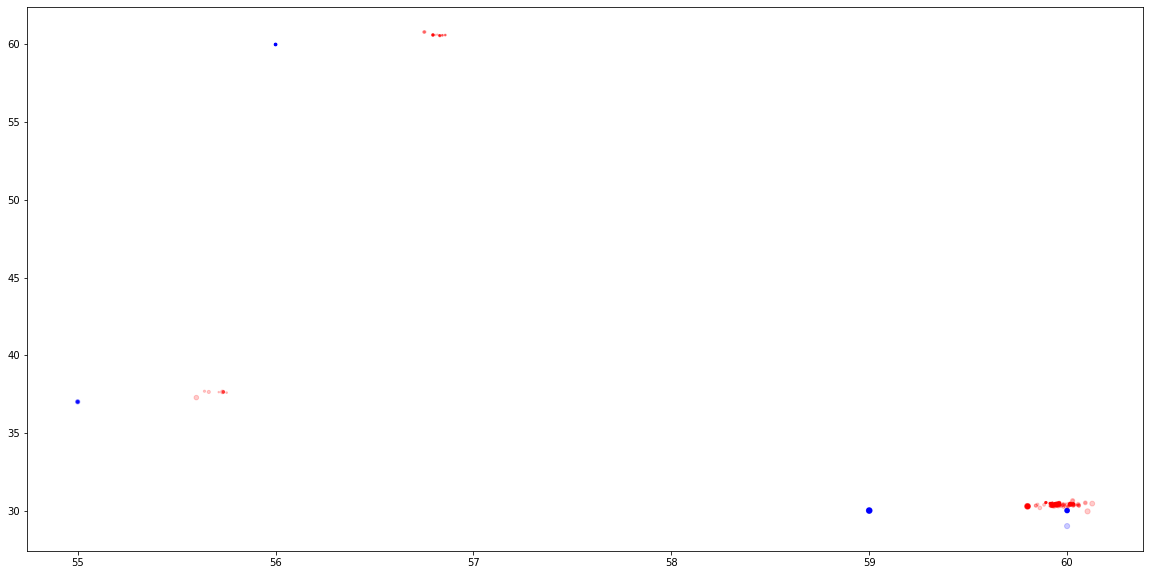

In [16]:
plt.figure(figsize=(20, 10))
plt.scatter(x = data['dropoff_lat'].astype('int'), y = data['dropoff_long'].astype('int'),s=data['price_usd'] ,color='b', alpha=0.2)
plt.scatter(x = data['dropoff_lat'], y = data['dropoff_long'],s=data['price_usd'] ,color='r', alpha=0.2)

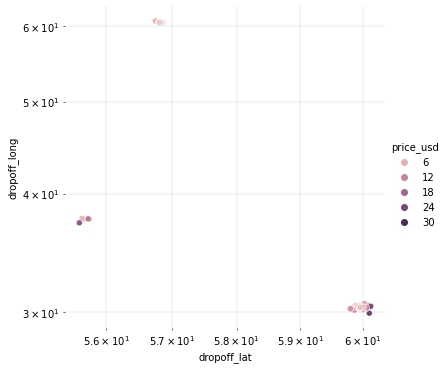

In [17]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x = data['dropoff_lat'], y = data['dropoff_long'],
    hue = data["price_usd"], sizes = (20, 15),
)
g.set(xscale = "log", yscale = "log")
g.ax.xaxis.grid(True, "minor", linewidth = .25)
g.ax.yaxis.grid(True, "minor", linewidth = .25)
g.despine(left = True, bottom = True)

In [18]:
data['distance_kms'].describe()
data['distance_kms'] = pd.cut(data['distance_kms'], bins = 4, labels = ['very_near', 'near', 'far', 'very_far'])

In [19]:
data

,trip_start_time,trip_end_time,trip_time,total_time,wait_time,trip_type,vehicle_make_model,vehicle_make,vehicle_model,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,city,price_usd,distance_kms,humidity,wind_speed,cloudness,weather_desc
0,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,00:29:00,00:07:27,uberX,Ford Focus,Ford,Focus,Male,60.031438,30.329826,59.963131,30.307655,Saint Petersburg,5.17,very_near,0.69,4.81,0.78,Mostly Cloudy
1,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,00:26:00,00:06:33,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.963014,30.307313,60.031351,30.329495,Saint Petersburg,4.97,very_near,0.70,6.53,0.66,Mostly Cloudy
2,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,01:23:00,00:16:07,uberX,Renault Fluence,Renault,Fluence,Male,60.031529,30.329416,59.924281,30.387561,Saint Petersburg,13.01,near,0.61,5.25,0.86,Mostly Cloudy
3,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,00:20:00,00:06:23,uberBLACK,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,Male,59.959883,30.311159,59.934680,30.308489,Saint Petersburg,25.99,very_near,0.84,0.87,0.56,Partly Cloudy
4,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,00:49:00,00:10:06,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.934813,30.308553,60.031470,30.329402,Saint Petersburg,13.43,near,0.90,1.61,0.31,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,00:12:00,00:01:23,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.939274,30.416977,59.946200,30.474258,Saint Petersburg,2.60,very_near,0.39,2.57,0.18,Clear
674,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,00:37:00,00:13:19,uberX,Dongfeng H30,Dongfeng,H30,Male,59.941415,30.366456,60.011173,30.386566,Saint Petersburg,3.92,very_near,0.62,5.37,0.48,Partly Cloudy
675,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,00:35:00,00:18:40,uberX,Chevrolet Aveo,Chevrolet,Aveo,Male,59.941415,30.366456,59.916832,30.450724,Saint Petersburg,2.78,very_near,0.76,4.02,0.9,Mostly Cloudy
676,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,00:23:00,00:03:41,uberX,Skoda Rapid,Skoda,Rapid,Male,59.916862,30.451020,59.941415,30.366456,Saint Petersburg,3.33,very_near,0.68,4.28,0.79,Mostly Cloudy


In [20]:
plt.figure(figsize=(30, 30))
sns.relplot(
    data=data,
    x = data['hour_start'].sort_values(), y = data['hour_end'].sort_values(),
    hue = data["price_usd"])

KeyError: 'hour_start'

<Figure size 2160x2160 with 0 Axes>

In [ ]:
data['total_time'] = pd.to_datetime(data['total_time']).dt.strftime('%H:%M')

In [ ]:
data['hour_total'] = data['total_time'].transform(lambda x: x.split(':')[0])
data['minute_total'] = data['total_time'].transform(lambda x: x.split(':')[1])

In [ ]:
data

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(x = data['hour_total'].astype('int'), y = data['minute_total'].astype('int'),s=data['price_usd'] * 10,color='r', alpha=0.1)

In [21]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [22]:
source = ColumnDataSource(data = data)

In [27]:
output_notebook()
p = figure()
p.circle(source = source, x = 'wind_speed', y = 'humidity', size='price_usd')

p.xaxis.axis_label = ' total_time '
p.yaxis.axis_label = ' Distance '
h = HoverTool()
h.tooltips=[
    ('weather:', '@weather_desc')
]
p.add_tools(h)
show(p)

Loading BokehJS ...

In [23]:
data

,trip_start_time,trip_end_time,trip_time,total_time,wait_time,trip_type,vehicle_make_model,vehicle_make,vehicle_model,driver_gender,pickup_lat,pickup_long,dropoff_lat,dropoff_long,city,price_usd,distance_kms,humidity,wind_speed,cloudness,weather_desc
0,2015-05-11 17:26:00,2015-05-11 17:55:00,00:21:33,00:29:00,00:07:27,uberX,Ford Focus,Ford,Focus,Male,60.031438,30.329826,59.963131,30.307655,Saint Petersburg,5.17,very_near,0.69,4.81,0.78,Mostly Cloudy
1,2015-05-11 18:46:00,2015-05-11 19:12:00,00:19:27,00:26:00,00:06:33,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.963014,30.307313,60.031351,30.329495,Saint Petersburg,4.97,very_near,0.70,6.53,0.66,Mostly Cloudy
2,2015-05-13 09:15:00,2015-05-13 10:38:00,01:06:53,01:23:00,00:16:07,uberX,Renault Fluence,Renault,Fluence,Male,60.031529,30.329416,59.924281,30.387561,Saint Petersburg,13.01,near,0.61,5.25,0.86,Mostly Cloudy
3,2015-05-16 00:24:00,2015-05-16 00:44:00,00:13:37,00:20:00,00:06:23,uberBLACK,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,Male,59.959883,30.311159,59.934680,30.308489,Saint Petersburg,25.99,very_near,0.84,0.87,0.56,Partly Cloudy
4,2015-05-16 01:29:00,2015-05-16 02:18:00,00:38:54,00:49:00,00:10:06,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.934813,30.308553,60.031470,30.329402,Saint Petersburg,13.43,near,0.90,1.61,0.31,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2018-04-23 11:59:00,2018-04-23 12:11:00,00:10:37,00:12:00,00:01:23,uberX,Hyundai Solaris,Hyundai,Solaris,Male,59.939274,30.416977,59.946200,30.474258,Saint Petersburg,2.60,very_near,0.39,2.57,0.18,Clear
674,2018-04-24 14:21:00,2018-04-24 14:58:00,00:23:41,00:37:00,00:13:19,uberX,Dongfeng H30,Dongfeng,H30,Male,59.941415,30.366456,60.011173,30.386566,Saint Petersburg,3.92,very_near,0.62,5.37,0.48,Partly Cloudy
675,2018-04-26 15:22:00,2018-04-26 15:57:00,00:16:20,00:35:00,00:18:40,uberX,Chevrolet Aveo,Chevrolet,Aveo,Male,59.941415,30.366456,59.916832,30.450724,Saint Petersburg,2.78,very_near,0.76,4.02,0.9,Mostly Cloudy
676,2018-04-26 16:37:00,2018-04-26 17:00:00,00:19:19,00:23:00,00:03:41,uberX,Skoda Rapid,Skoda,Rapid,Male,59.916862,30.451020,59.941415,30.366456,Saint Petersburg,3.33,very_near,0.68,4.28,0.79,Mostly Cloudy
